# Python imports

In [37]:
import io, os
import pandas as pd
from Bio import SeqIO
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from PIL import Image

## Python functions

In [45]:
# A bit of code that will help us display the PDF output
def PDF(filename):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % filename)

# Some code to return a Pandas dataframe, given tabular text
def to_df(result):
    return pd.read_table(io.StringIO(result), header=None)

# show donwloaded iamge
def show_byte_image(img):
    return Image.open(io.BytesIO(img))

## kegg_info()
This function returns basic information about a specified `KEGG` database - much like visiting the landing page for that database.
For instance, to get information about the KEGG databases as a whole, you can use kegg_info("kegg") to get a handle from KEGG describing the databases, and catch it in a variable:
result = REST.kegg_info("kegg").read()
We could convert this handle to a Pandas dataframe with the function defined above: to_df():
to_df(result)
Not all data is suited to `pandas` dataframe representation
or .read() the handle, and print it to output directly with the print() statement:
print(result)

In [7]:
result = REST.kegg_info("kegg").read()
print(result)

kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 101.0+/03-21, Mar 22
                 Kanehisa Laboratories
                 pathway     902,249 entries
                 brite       307,308 entries
                 module          534 entries
                 orthology    24,940 entries
                 genome        8,284 entries
                 genes     40,763,481 entries
                 compound     18,907 entries
                 glycan       11,084 entries
                 reaction     11,748 entries
                 rclass        3,177 entries
                 enzyme        7,933 entries
                 network       1,541 entries
                 variant         456 entries
                 disease       2,551 entries
                 drug         11,865 entries
                 dgroup        2,383 entries



In [8]:
# Print information about the PATHWAY database
result = REST.kegg_info("pathway").read()
print(result)

pathway          KEGG Pathway Database
path             Release 101.0+/03-21, Mar 22
                 Kanehisa Laboratories
                 902,249 entries

linked db        module
                 ko
                 genome
                 <org>
                 compound
                 glycan
                 reaction
                 rclass
                 enzyme
                 network
                 disease
                 drug
                 pubmed



In [21]:
# Print information about Escherichia coli MG1655
result = REST.kegg_info("eco").read()
print(result)

T00007           Escherichia coli K-12 MG1655 KEGG Genes Database
eco              Release 101.0+/03-20, Mar 22
                 Kanehisa Laboratories
                 4,609 entries

linked db        pathway
                 brite
                 module
                 ko
                 genome
                 enzyme
                 ncbi-geneid
                 ncbi-proteinid
                 uniprot



## kegg_list()
The `kegg_list()` function returns a table of entry identifiers and definitions for a specified database.
For example, to list all the entries in the PATHWAY database, you could use:

In [10]:
# Get all entries in the PATHWAY database as a dataframe
result = REST.kegg_list("pathway").read()
to_df(result)

,0,1
0,path:map00010,Glycolysis / Gluconeogenesis
1,path:map00020,Citrate cycle (TCA cycle)
2,path:map00030,Pentose phosphate pathway
3,path:map00040,Pentose and glucuronate interconversions
4,path:map00051,Fructose and mannose metabolism
...,...,...
545,path:map07231,Sodium channel blocking drugs
546,path:map07232,Potassium channel blocking and opening drugs
547,path:map07233,Ion transporter inhibitors
548,path:map07234,Neurotransmitter transporter inhibitors


In [14]:
# Get all entries in the PATHWAY database for E. coli MG1655 as a dataframe
result = REST.kegg_list("pathway", "eco").read()
to_df(result)

,0,1
0,path:eco00010,Glycolysis / Gluconeogenesis - Escherichia col...
1,path:eco00020,Citrate cycle (TCA cycle) - Escherichia coli K...
2,path:eco00030,Pentose phosphate pathway - Escherichia coli K...
3,path:eco00040,Pentose and glucuronate interconversions - Esc...
4,path:eco00051,Fructose and mannose metabolism - Escherichia ...
...,...,...
119,path:eco03410,Base excision repair - Escherichia coli K-12 M...
120,path:eco03420,Nucleotide excision repair - Escherichia coli ...
121,path:eco03430,Mismatch repair - Escherichia coli K-12 MG1655
122,path:eco03440,Homologous recombination - Escherichia coli K-...


If, instead of specifying one of the top-level KEGG databases, you specify an organism code, KEGG will return a list of gene entries for that organism:

In [18]:
# Get all genes from E. coli MG1655 as a dataframe
result = REST.kegg_list("eco").read()
to_df(result)

,0,1
0,eco:b0001,thrL; thr operon leader peptide
1,eco:b0002,thrA; fused aspartate kinase/homoserine dehydr...
2,eco:b0003,thrB; homoserine kinase
3,eco:b0004,thrC; threonine synthase
4,eco:b0005,yaaX; DUF2502 domain-containing protein YaaX
...,...,...
4604,eco:b4399,creC; sensory histidine kinase CreC
4605,eco:b4400,creD; putative inner membrane protein CreD
4606,eco:b4401,arcA; DNA-binding transcriptional dual regulat...
4607,eco:b4402,yjjY; uncharacterized protein YjjY


## kegg_find()
The `kegg_find()` function will search a named `KEGG` database with a specified query term.
For instance, to query the GENES database with the entry accession KSE_17560 you could use:

In [24]:
# Find a specific entry with a precise search term
result = REST.kegg_find("genes", "b0001").read()
to_df(result)

,0,1
0,cel:CELE_B0001.10,Unclassified non-coding RNA B0001.10
1,cel:CELE_B0001.1,lin-24; Uncharacterized protein
2,cel:CELE_B0001.12,Unclassified non-coding RNA B0001.12
3,cel:CELE_B0001.11,Unclassified non-coding RNA B0001.11
4,cel:CELE_B0001.4,B0001.4; Probable uridine-cytidine kinase
...,...,...
262,bafz:BafPKo_B0001,acylphosphatase family protein
263,bbs:BbiDN127_B0001,acylphosphatase family protein
264,ctm:Cabther_B0001,ATPases involved in chromosome partitioning
265,hsw:Hsw_PB0001,hypothetical protein


With the query above, KEGG returns information for the exact entry we've requested. But we can also use less precise search terms, and combine them with the + symbol. For example, to search for shiga toxin we would use the query:
"shiga+toxin"

In [25]:
# Find all shiga toxin genes
result = REST.kegg_find("genes", "shiga+toxin").read()
to_df(result)

,0,1
0,ece:Z1464,stx2A; shiga-like toxin II A subunit encoded b...
1,ece:Z1465,stx2B; shiga-like toxin II B subunit encoded b...
2,ece:Z3343,stx1B; shiga-like toxin 1 subunit B encoded wi...
3,ece:Z3344,stx1A; shiga-like toxin 1 subunit A encoded wi...
4,ecs:ECs_1205,stx2A; Shiga toxin 2 subunit A
...,...,...
135,vg:56166857,H3H23_gp79; Escherichia phage ArgO145; Shiga t...
136,vg:56166935,H3H24_gp42; Escherichia phage SH2026Stx1; Shig...
137,vg:56166936,H3H24_gp43; Escherichia phage SH2026Stx1; Shig...
138,vg:56166750,H3H22_gp23; Escherichia phage Lyz12581Vzw; Shi...


We can restrict this search to specific organisms, such as Escherichia coli O111 H-11128 (EHEC), by supplying its three letter code (here, eoi) as the database to be searched:

In [26]:
# Find all shiga toxin genes in eoi
result = REST.kegg_find("eoi", "shiga+toxin").read()
to_df(result)

,0,1
0,eoi:ECO111_2429,Shiga toxin 2 subunit B
1,eoi:ECO111_2430,Shiga toxin 2 subunit A
2,eoi:ECO111_3361,Shiga toxin 1 subunit A
3,eoi:ECO111_3362,Shiga toxin 1 subunit B


In [27]:
# Find all compounds with mass between 300 and 310 units
result = REST.kegg_find("compound", "300-310/mol_weight").read()
to_df(result)

,0,1
0,cpd:C00051,307.323480
1,cpd:C00200,306.336960
2,cpd:C00219,304.466880
3,cpd:C00239,307.197122
4,cpd:C00270,309.269860
...,...,...
521,cpd:C22010,304.466880
522,cpd:C22101,306.269220
523,cpd:C22103,304.509940
524,cpd:C22382,309.269860


## kegg_get()
Most functions you've seen so far will return two columns of data: the first column being the entry accession, and the second column being a description of that entry, or the requested value.
The `kegg_get()` function lets us retrieve specific entries from `KEGG` - such as our search results - in named formats.
For example, the first compound in our search for molecular weights in the range 300-310 above has entry accession cpd:C00051. We can recover this entry as follows:

In [31]:
# Get the entry information for eco:b0001
result = REST.kegg_get("eco:b0001").read()
print(result)

ENTRY       b0001             CDS       T00007
SYMBOL      thrL
NAME        (RefSeq) thr operon leader peptide
ORTHOLOGY   K08278  thr operon leader peptide
ORGANISM    eco  Escherichia coli K-12 MG1655
BRITE       KEGG Orthology (KO) [BR:eco00001]
             09190 Not Included in Pathway or Brite
              09192 Unclassified: genetic information processing
               99973 Transcription
                b0001 (thrL)
POSITION    190..255
MOTIF       Pfam: Leader_Thr
DBLINKS     NCBI-GeneID: 944742
            NCBI-ProteinID: NP_414542
            Pasteur: thrL
            RegulonDB: ECK120001251
            ECOCYC: EG11277
            ASAP: ABE-0000006
            UniProt: P0AD86
AASEQ       21
            MKRISTTITTTITITTGNGAG
NTSEQ       66
            atgaaacgcattagcaccaccattaccaccaccatcaccattaccacaggtaacggtgcg
            ggctga
///



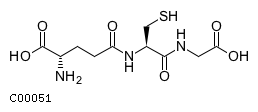

In [46]:
# Display molecular structure for cpd:C00051
result = REST.kegg_get("cpd:C00051", "image").read()
show_byte_image(result)

In [47]:
# Get entry information for eco:b0001
result = REST.kegg_get("eco:b0001").read()
print(result)

ENTRY       b0001             CDS       T00007
SYMBOL      thrL
NAME        (RefSeq) thr operon leader peptide
ORTHOLOGY   K08278  thr operon leader peptide
ORGANISM    eco  Escherichia coli K-12 MG1655
BRITE       KEGG Orthology (KO) [BR:eco00001]
             09190 Not Included in Pathway or Brite
              09192 Unclassified: genetic information processing
               99973 Transcription
                b0001 (thrL)
POSITION    190..255
MOTIF       Pfam: Leader_Thr
DBLINKS     NCBI-GeneID: 944742
            NCBI-ProteinID: NP_414542
            Pasteur: thrL
            RegulonDB: ECK120001251
            ECOCYC: EG11277
            ASAP: ABE-0000006
            UniProt: P0AD86
AASEQ       21
            MKRISTTITTTITITTGNGAG
NTSEQ       66
            atgaaacgcattagcaccaccattaccaccaccatcaccattaccacaggtaacggtgcg
            ggctga
///



In [48]:
# Get coding sequence for b0001
result = REST.kegg_get("eco:b0001", "ntseq").read()
print(result)

>eco:b0001 K08278 thr operon leader peptide | (RefSeq) thrL; thr operon leader peptide (N)
atgaaacgcattagcaccaccattaccaccaccatcaccattaccacaggtaacggtgcg
ggctga



In [49]:
# Get protein sequence for b0001
result = REST.kegg_get("eco:b0001", "aaseq").read()
print(result)

>eco:b0001 K08278 thr operon leader peptide | (RefSeq) thrL; thr operon leader peptide (A)
MKRISTTITTTITITTGNGAG



## Retrieving pathways
`KEGG` is practically synonymous with its excellent pathway diagrams, and it should be no surprise that you can retrive these using Python, too. You can get these images directly with `kegg_get()`, using the `"image"` format.
To specify one of the generic pathway maps, you can combine the map prefix with the pathway number to make the query mapNNNNN as in the cells, below.

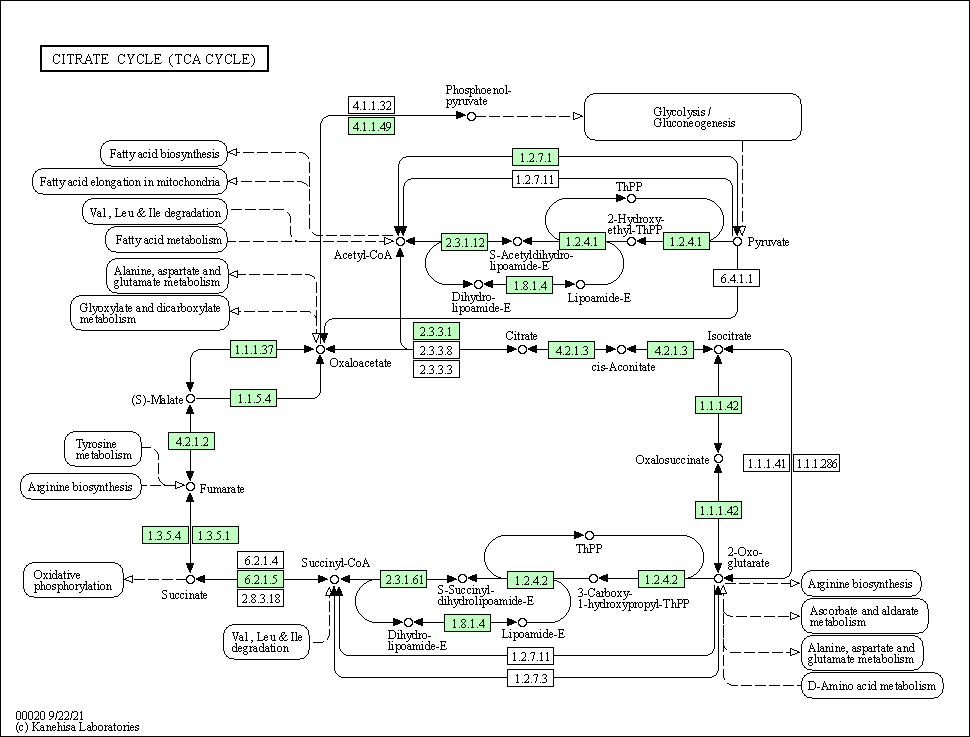

In [52]:
# Get map of the pathway for TCA cycle
result = REST.kegg_get("path:eco00020", "image").read()
show_byte_image(result)

In [ ]:
# Get data for eco TCA
result = REST.kegg_get("path:eco00020").read()
print(result)

ENTRY       eco00020                    Pathway
NAME        Citrate cycle (TCA cycle) - Escherichia coli K-12 MG1655
DESCRIPTION The citrate cycle (TCA cycle, Krebs cycle) is an important aerobic pathway for the final steps of the oxidation of carbohydrates and fatty acids. The cycle starts with acetyl-CoA, the activated form of acetate, derived from glycolysis and pyruvate oxidation for carbohydrates and from beta oxidation of fatty acids. The two-carbon acetyl group in acetyl-CoA is transferred to the four-carbon compound of oxaloacetate to form the six-carbon compound of citrate. In a series of reactions two carbons in citrate are oxidized to CO2 and the reaction pathway supplies NADH for use in the oxidative phosphorylation and other metabolic processes. The pathway also supplies important precursor metabolites including 2-oxoglutarate. At the end of the cycle the remaining four-carbon part is transformed back to oxaloacetate. According to the genome sequence data, many organisms s

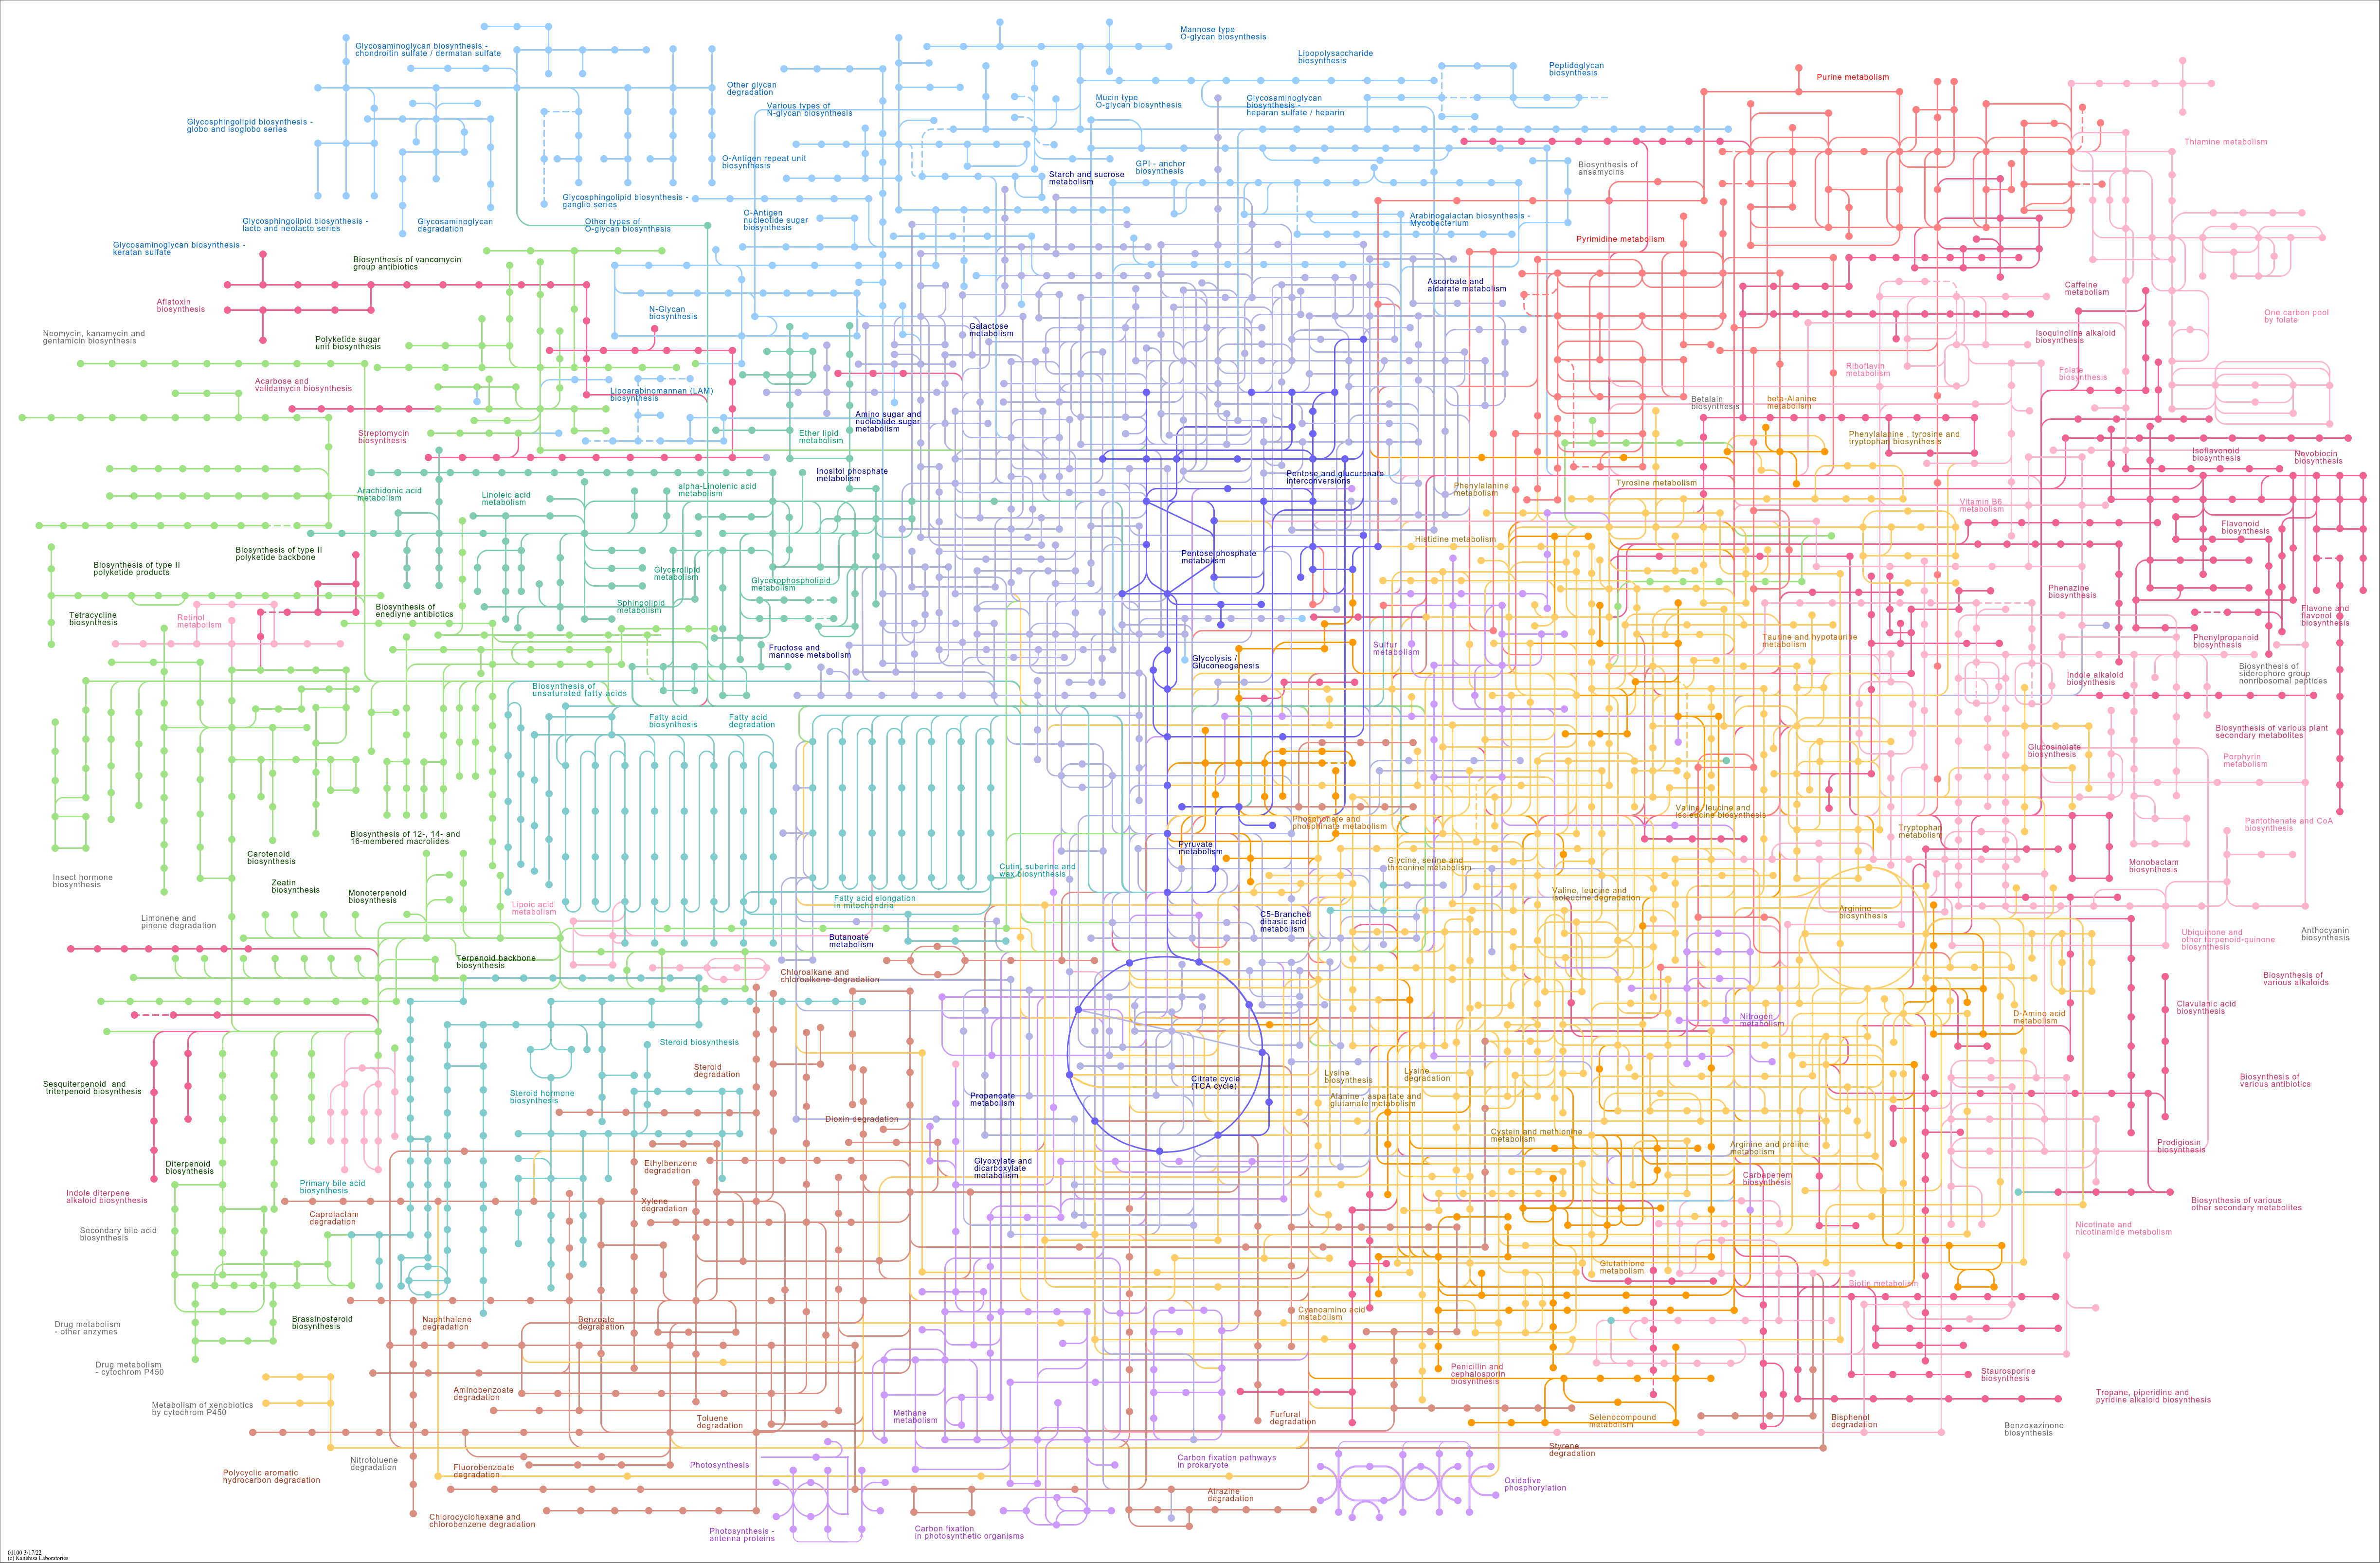

In [53]:
# Get map of central metabolism
result = REST.kegg_get("map01100", "image").read()
show_byte_image(result)

## Retrieving pathway components
As you can see from the database entry for ksk00061 above, the pathway is composed of many GENE and COMPOUND entries, but the returned data format is not easy to work with to extract that data.
You can use the `kegg_link()` function to identify the components of a pathway, by specifying first the `` you want to make a connection to, then the `` for the database entry you are interested in:
result = REST.kegg_link(<database>, <entry>).read()
For instance, to identify the COMPOUND entries represented in the map00061 pathway, you would compose the query:
result = REST.kegg_link("compound", "map00061").read()
as below:

In [59]:
# Get genes involved in quorum sensing
result = REST.kegg_link("compound", "map02024").read()
to_df(result)

,0,1
0,path:map02024,cpd:C00007
1,path:map02024,cpd:C00009
2,path:map02024,cpd:C00059
3,path:map02024,cpd:C00232
4,path:map02024,cpd:C00334
5,path:map02024,cpd:C00547
6,path:map02024,cpd:C00788
7,path:map02024,cpd:C01019
8,path:map02024,cpd:C11837
9,path:map02024,cpd:C11841


In [61]:
# Get reactions involved with fatty-acid biosynthesis
result = REST.kegg_link("rn", "map00061").read()
to_df(result)

,0,1
0,path:map00061,rn:R00390
1,path:map00061,rn:R00742
2,path:map00061,rn:R01280
3,path:map00061,rn:R01403
4,path:map00061,rn:R01404
...,...,...
63,path:map00061,rn:R10707
64,path:map00061,rn:R10714
65,path:map00061,rn:R12300
66,path:map00061,rn:R12328


In [62]:
# Get reactions R00742
result = REST.kegg_get("R00742").read()
print(result)

ENTRY       R00742                      Reaction
NAME        acetyl-CoA:carbon-dioxide ligase (ADP-forming)
DEFINITION  ATP + Acetyl-CoA + HCO3- <=> ADP + Orthophosphate + Malonyl-CoA
EQUATION    C00002 + C00024 + C00288 <=> C00008 + C00009 + C00083
COMMENT     two-step reaction (see R04385 + R04386)
RCLASS      RC00002  C00002_C00008
            RC00040  C00024_C00083
            RC00367  C00083_C00288
ENZYME      6.4.1.2
PATHWAY     rn00061  Fatty acid biosynthesis
            rn00254  Aflatoxin biosynthesis
            rn00620  Pyruvate metabolism
            rn00640  Propanoate metabolism
            rn00720  Carbon fixation pathways in prokaryotes
            rn01100  Metabolic pathways
            rn01110  Biosynthesis of secondary metabolites
            rn01120  Microbial metabolism in diverse environments
            rn01200  Carbon metabolism
            rn01212  Fatty acid metabolism
MODULE      M00082  Fatty acid biosynthesis, initiation
            M00375  Hydroxypropionat

In [63]:
dir(REST)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_q',
 'io',
 'kegg_conv',
 'kegg_find',
 'kegg_get',
 'kegg_info',
 'kegg_link',
 'kegg_list',
 'urlopen']